# Time-Series Forcasting (TSF) ML

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Predicting Avocado Prices | Facebook Prophet
Dataset Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices

Facebook Prophet: https://facebook.github.io/prophet/


In [2]:

!pip install prophet

In [3]:
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,11,2018-01-07,0.85,303963.18,167628.98,10026.09,409.67,125898.44,108075.96,16240.96,1581.52,conventional,2018.0,Nashville
8802,0,2018-03-25,1.04,305105.53,171335.77,20076.04,2425.10,111268.62,94895.33,15963.29,410.00,conventional,2018.0,NewOrleansMobile
8803,1,2018-03-18,1.02,316969.55,181011.25,19002.68,2515.00,114440.62,95470.29,18533.66,436.67,conventional,2018.0,NewOrleansMobile
8804,2,2018-03-11,1.05,316463.18,177320.17,22478.10,2158.00,114506.91,93807.58,20352.66,346.67,conventional,2018.0,NewOrleansMobile


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 0 to 8805
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8806 non-null   int64  
 1   Date          8806 non-null   object 
 2   AveragePrice  8806 non-null   float64
 3   Total Volume  8806 non-null   float64
 4   4046          8806 non-null   float64
 5   4225          8806 non-null   float64
 6   4770          8806 non-null   float64
 7   Total Bags    8806 non-null   float64
 8   Small Bags    8805 non-null   float64
 9   Large Bags    8805 non-null   float64
 10  XLarge Bags   8805 non-null   float64
 11  type          8805 non-null   object 
 12  year          8805 non-null   float64
 13  region        8805 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 963.3+ KB


In [5]:
data = data.sort_values('Date')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
363,51,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California
1715,51,2015-01-04,1.10,407675.56,24190.91,294715.33,2121.45,86647.87,72829.94,13817.93,0.00,conventional,2015.0,Philadelphia
2443,51,2015-01-04,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,conventional,2015.0,Southeast
311,51,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015.0,BuffaloRochester
1143,51,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015.0,LasVegas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,0,2018-03-25,1.02,950483.37,176286.79,222958.27,16540.62,534697.69,121655.40,413042.29,0.00,conventional,2018.0,Denver
8550,0,2018-03-25,1.04,6687009.44,1932162.02,2715163.60,92955.04,1946728.78,1827362.50,37434.21,81932.07,conventional,2018.0,California
8562,0,2018-03-25,1.32,258547.55,68088.95,87220.18,5567.45,97670.97,92743.21,4926.65,1.11,conventional,2018.0,Charlotte
8502,0,2018-03-25,1.23,986038.75,108250.52,591934.75,4205.03,281648.45,277508.08,2777.04,1363.33,conventional,2018.0,BaltimoreWashington


## Exploring Data

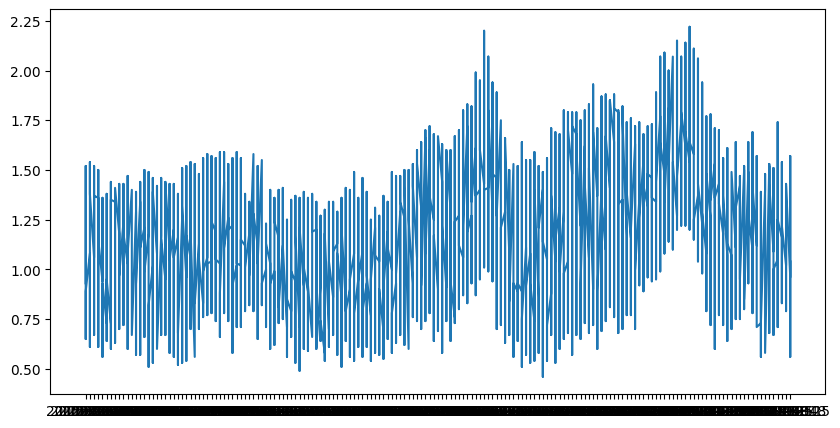

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'],data['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

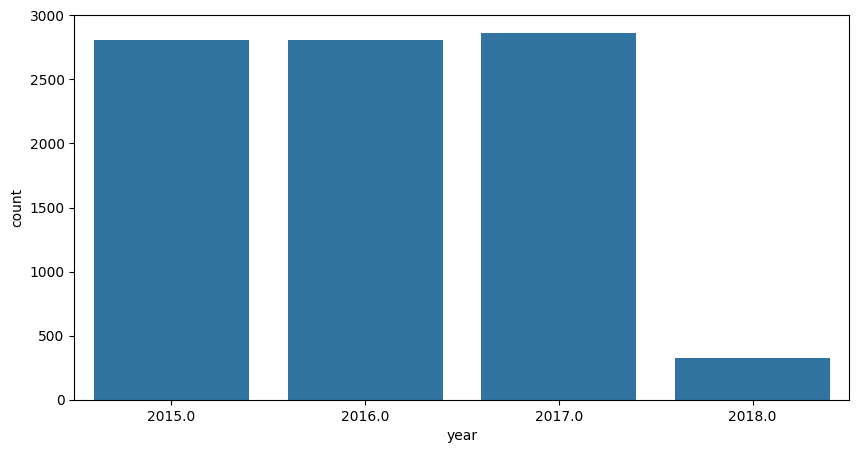

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(x='year',data=data)

## Pre-processing Data

In [9]:
avocado_prophet = data[['Date','AveragePrice']]
avocado_prophet

,Date,AveragePrice
363,2015-01-04,0.93
1715,2015-01-04,1.10
2443,2015-01-04,0.98
311,2015-01-04,1.40
1143,2015-01-04,0.80
...,...,...
8622,2018-03-25,1.02
8550,2018-03-25,1.04
8562,2018-03-25,1.32
8502,2018-03-25,1.23


# Model Training & Building

In [15]:
from prophet import Prophet


In [19]:
avocado_prophet.rename(columns={'Date': 'ds', 'AveragePrice': 'y'}, inplace=True)


In [20]:
model = Prophet()
model.fit(avocado_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49xchgaq/n94j3cpz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp49xchgaq/sn8g8awp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66562', 'data', 'file=/tmp/tmp49xchgaq/n94j3cpz.json', 'init=/tmp/tmp49xchgaq/sn8g8awp.json', 'output', 'file=/tmp/tmp49xchgaq/prophet_model39nc4b_g/prophet_model-20250705144654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:46:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
future = model.make_future_dataframe(periods=365)

In [22]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.257279,0.837872,1.404492,1.257279,1.257279,-0.136844,-0.136844,-0.136844,-0.136844,-0.136844,-0.136844,0.0,0.0,0.0,1.120435
1,2015-01-11,1.251359,0.834256,1.406269,1.251359,1.251359,-0.126711,-0.126711,-0.126711,-0.126711,-0.126711,-0.126711,0.0,0.0,0.0,1.124648
2,2015-01-18,1.245439,0.854980,1.394246,1.245439,1.245439,-0.129187,-0.129187,-0.129187,-0.129187,-0.129187,-0.129187,0.0,0.0,0.0,1.116251
3,2015-01-25,1.239519,0.787065,1.338726,1.239519,1.239519,-0.159274,-0.159274,-0.159274,-0.159274,-0.159274,-0.159274,0.0,0.0,0.0,1.080245
4,2015-02-01,1.233599,0.737003,1.314010,1.233599,1.233599,-0.203910,-0.203910,-0.203910,-0.203910,-0.203910,-0.203910,0.0,0.0,0.0,1.029688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.091481,0.500040,1.495835,0.677710,1.478880,-0.073883,-0.073883,-0.073883,-0.073883,-0.073883,-0.073883,0.0,0.0,0.0,1.017597
530,2019-03-22,1.091091,0.511038,1.498706,0.676346,1.478908,-0.073022,-0.073022,-0.073022,-0.073022,-0.073022,-0.073022,0.0,0.0,0.0,1.018068
531,2019-03-23,1.090700,0.490052,1.479618,0.674789,1.479868,-0.071776,-0.071776,-0.071776,-0.071776,-0.071776,-0.071776,0.0,0.0,0.0,1.018925
532,2019-03-24,1.090310,0.496473,1.471416,0.672442,1.481268,-0.070154,-0.070154,-0.070154,-0.070154,-0.070154,-0.070154,0.0,0.0,0.0,1.020156


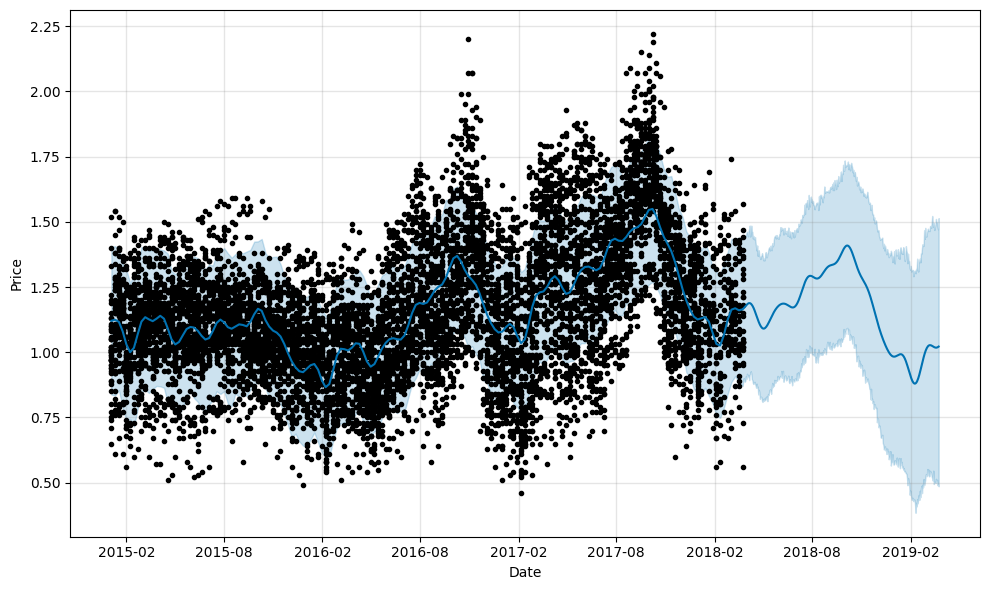

In [23]:
figure_forecast = model.plot(forecast, xlabel='Date', ylabel='Price')

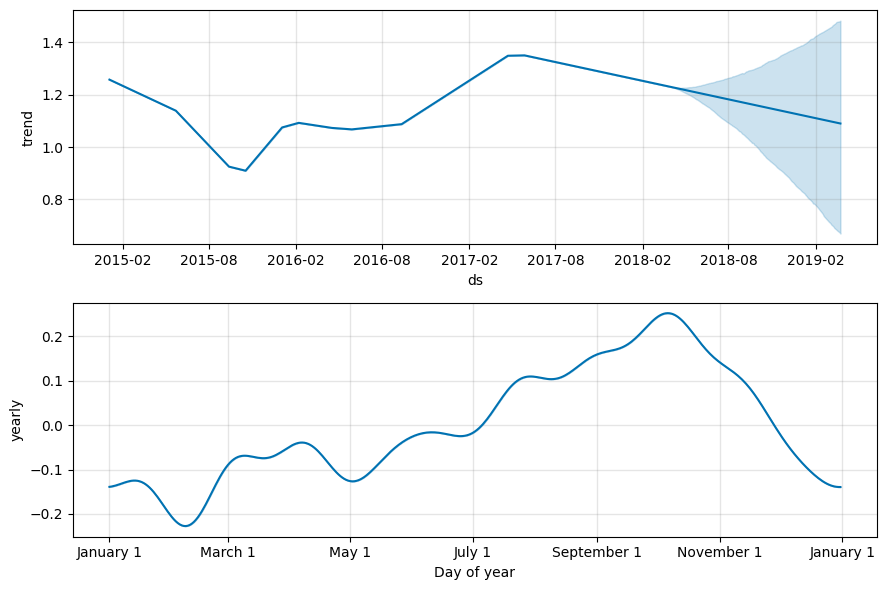

In [24]:
figure_Components = model.plot_components(forecast)